<a href="https://colab.research.google.com/github/RosarioH10062002/connectivity-biomarkers-pd-depression/blob/main/ISP_Participants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LIBRARIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


# Obtain Participants

## Dataset Curation Criteria

To ensure acquisition homogeneity, the following inclusion criteria were applied:

- Manufacturer: Siemens  
- Field strength: 3T  
- Modality: fMRI  
- Acquisition: rsfMRI_RL  
- Visit: Baseline only  
- One scan per subject  

These criteria were applied prior to all statistical analyses.


In [ ]:
csv_path = "/content/drive/MyDrive/M2/Impact Scholar Programme/Final_dataset_participants.csv"
df = pd.read_csv(csv_path, sep = ",")
df.head(4)
#df.shape

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I1526359,100005,PD,M,53,BL,fMRI,rsfMRI_RL,Original,1/27/2021,DCM,NaN
1,I1526360,100005,PD,M,53,BL,fMRI,rsfMRI_L_R,Original,1/27/2021,DCM,NaN
2,I1526375,100006,PD,F,56,BL,fMRI,rsfMRI_RL,Original,12/16/2020,DCM,NaN
3,I1526376,100006,PD,F,56,BL,fMRI,rsfMRI_L_R,Original,12/16/2020,DCM,NaN


In [ ]:
# Keep only consistent rs-fMRI RL acquisitions
keep_desc = ["rsfMRI_RL"]
df = df[df["Description"].isin(keep_desc)].copy()

pd_subjects = (
    df[df["Group"] == "PD"]["Subject"]
    .drop_duplicates()
    .head(6)
)

ctrl_subjects = (
    df[df["Group"] == "Control"]["Subject"]
    .drop_duplicates()
    .head(7)
)

selected_subjects = list(pd_subjects) + list(ctrl_subjects)

subset = df[df["Subject"].isin(selected_subjects)].copy()

# Keep only one scan per subject
subset = subset.sort_values("Description").drop_duplicates("Subject")

subset.to_csv("participants_subset.csv", index=False)

print("Total subjects:", subset["Subject"].nunique())
print(subset["Group"].value_counts())
print(subset["Description"].value_counts())


Total subjects: 13
Group
Control    7
PD         6
Name: count, dtype: int64
Description
rsfMRI_RL    13
Name: count, dtype: int64


In [ ]:
pd_subjects, ctrl_subjects

(0     100005
 2     100006
 4     100007
 7     100018
 9     100267
 10    100268
 Name: Subject, dtype: int64,
 19     100890
 56     101195
 116    102447
 124    103161
 126    103183
 129    103467
 130    103542
 Name: Subject, dtype: int64)

#Geriatric Depression Scale (GDS)


In [ ]:
path = "/content/drive/My Drive/M2/Impact Scholar Programme/dataset_correct.csv"
dataset_gdsc = pd.read_csv(path, sep = ",")

In [ ]:
dataset_gdsc.head(20)

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
0,100005,M,69.0,PD,Baseline,12/14/2021,1/27/2021,52.8,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526359,Brain,All,Both,NaN,native
1,100005,M,69.0,PD,Baseline,12/14/2021,1/27/2021,52.8,0.0,fMRI,rsfMRI_L_R,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526360,Brain,All,Both,NaN,native
2,100006,F,109.0,PD,Baseline,12/14/2021,12/16/2020,55.7,2.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526375,Brain,All,Both,NaN,native
3,100006,F,109.0,PD,Baseline,12/14/2021,12/16/2020,55.7,2.0,fMRI,rsfMRI_L_R,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526376,Brain,All,Both,NaN,native
4,100007,M,73.0,PD,Baseline,12/13/2021,12/09/2020,67.2,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1525726,Brain,All,Both,NaN,native
5,100007,M,73.0,PD,Baseline,12/13/2021,12/09/2020,67.2,0.0,fMRI,rsfMRI_L_R,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1525727,Brain,All,Both,NaN,native
6,100018,F,63.4,PD,Baseline,9/28/2021,2/02/2021,69.7,5.0,fMRI,rsfMRI_LR,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497579,Brain,All,Both,NaN,native
7,100018,F,63.4,PD,Baseline,9/28/2021,2/02/2021,69.7,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497580,Brain,All,Both,NaN,native
8,100267,M,81.7,PD,Baseline,9/28/2021,2/19/2021,53.6,6.0,fMRI,rsfMRI_LR,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497591,Brain,All,Both,NaN,native
9,100267,M,81.7,PD,Baseline,9/28/2021,2/19/2021,53.6,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497592,Brain,All,Both,NaN,native


In [ ]:
siemens_mask = dataset_gdsc["Imaging Protocol"] == "Field Strength=3.0;TE=30.0;Manufacturer=SIEMENS;Slice Thickness=3.5;TR=2500.0"
df_siemens = dataset_gdsc[siemens_mask].copy()

print(df_siemens.shape)

(462, 19)


In [ ]:
rl_mask = df_siemens["Description"] == "rsfMRI_RL"
df_rl = df_siemens[rl_mask].copy()

print(df_rl["Description"].value_counts())
print(df_rl.shape)


Description
rsfMRI_RL    148
Name: count, dtype: int64
(148, 19)


In [ ]:
from pathlib import Path
path_save = Path("/content/drive/MyDrive/M2/Impact Scholar Programme/")
df_rl = df_rl.dropna(subset=["GDSCALE Total Score"])
print(df_rl.shape)
df_rl.to_csv(path_save/"filtered_list.csv", index=False)

(144, 19)


In [ ]:
ids = [100267,100842,101018,101050,101146,101174,101476,101479,101675,101735,101742,101751,101841,102012,102053,102078,102305,102321,102420]
print(len(ids))
filtered_df = df_rl[df_rl["Subject ID"].isin(ids)]
print(len(filtered_df))
#filtered_df
depressed_list = filtered_df[filtered_df["GDSCALE Total Score"] > 5]
non_depressed_list = filtered_df[filtered_df["GDSCALE Total Score"] <= 5]
print(f"{len(depressed_list)}; {len(non_depressed_list)}")
#depressed_geetha

19
18
2; 16


In [ ]:
depressed_list

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
9,100267,M,81.7,PD,Baseline,9/28/2021,2/19/2021,53.6,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497592,Brain,All,Both,NaN,native
36,101050,F,55.2,PD,Baseline,9/13/2021,4/19/2021,49.7,11.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1491225,Brain,All,Both,NaN,native


In [ ]:
non_depressed_list["Subject ID"]

,Subject ID
13,100842
20,101018
46,101146
49,101174
70,101476
73,101479
84,101735
87,101742
90,101751
92,101841


In [ ]:
df_pd = df_rl[df_rl["Research Group"]=="PD"].copy()
df_pd.loc[:, "Depression_Status"] = np.where(
    df_pd["GDSCALE Total Score"] >= 5,
    "Depressed",
    "Not Depressed"
)
df_pd["Depression_Status"].value_counts()

,count
Depression_Status,
Not Depressed,108
Depressed,17


In [ ]:
df_ctrl = df_rl[df_rl["Research Group"] == "Control"].copy()

df_ctrl.loc[:, "Depression_Status"] = np.where(
    df_ctrl["GDSCALE Total Score"] >= 5,
    "Depressed",
    "Not Depressed"
)

df_ctrl["Depression_Status"].value_counts()


,count
Depression_Status,
Not Depressed,19


In [ ]:
df_pd_sorted = (
    df_rl[df_rl["Research Group"] == "PD"]
    .sort_values(by="GDSCALE Total Score", ascending=False)
)
df_pd_sorted.head(20)

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
498,182427,M,87.0,PD,Baseline,3/21/2023,1/09/2023,69.0,12.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1681022,Brain,All,Both,NaN,native
36,101050,F,55.2,PD,Baseline,9/13/2021,4/19/2021,49.7,11.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1491225,Brain,All,Both,NaN,native
507,184432,F,80.0,PD,Baseline,3/16/2023,2/08/2023,60.1,10.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1678651,Brain,All,Both,NaN,native
461,174141,M,87.5,PD,Baseline,3/21/2023,2/06/2023,78.7,8.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1680493,Brain,All,Both,NaN,native
122,102978,F,60.0,PD,Baseline,9/30/2021,9/16/2021,54.7,7.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1498864,Brain,All,Both,NaN,native
268,139859,M,70.0,PD,Baseline,5/17/2022,5/01/2022,56.9,7.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1581557,Brain,All,Both,NaN,native
538,219411,M,77.5,PD,Baseline,6/26/2023,5/16/2023,63.4,7.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1719765,Brain,All,Both,NaN,native
439,172260,M,94.0,PD,Baseline,1/28/2023,11/24/2022,66.9,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1661168,Brain,All,Both,NaN,native
9,100267,M,81.7,PD,Baseline,9/28/2021,2/19/2021,53.6,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497592,Brain,All,Both,NaN,native
243,133507,M,77.0,PD,Baseline,2/25/2022,2/11/2022,66.5,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1548879,Brain,All,Both,NaN,native


In [ ]:
pd_list = [100267, 101050, 102978, 174141, 182427, 184432]
pd_not_in_list = df_pd_sorted[~df_pd_sorted["Subject ID"].isin(pd_list)]
pd_not_in_list.head(20)

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
268,139859,M,70.0,PD,Baseline,5/17/2022,5/01/2022,56.9,7.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1581557,Brain,All,Both,NaN,native
538,219411,M,77.5,PD,Baseline,6/26/2023,5/16/2023,63.4,7.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1719765,Brain,All,Both,NaN,native
439,172260,M,94.0,PD,Baseline,1/28/2023,11/24/2022,66.9,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1661168,Brain,All,Both,NaN,native
243,133507,M,77.0,PD,Baseline,2/25/2022,2/11/2022,66.5,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1548879,Brain,All,Both,NaN,native
319,144131,M,90.0,PD,Baseline,7/06/2022,5/30/2022,63.9,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1602697,Brain,All,Both,NaN,native
13,100842,M,77.7,PD,Baseline,9/13/2021,3/29/2021,63.9,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1491215,Brain,All,Both,NaN,native
7,100018,F,63.4,PD,Baseline,9/28/2021,2/02/2021,69.7,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497580,Brain,All,Both,NaN,native
286,141135,M,98.0,PD,Baseline,4/29/2022,3/17/2022,53.2,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1575250,Brain,All,Both,NaN,native
524,211482,M,85.0,PD,Baseline,3/17/2023,2/16/2023,69.1,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1678818,Brain,All,Both,NaN,native
302,142879,F,72.0,PD,Baseline,3/29/2022,3/15/2022,80.5,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1561867,Brain,All,Both,NaN,native


In [ ]:
pd_not_in_list_depressed = df_pd_sorted[
    (~df_pd_sorted["Subject ID"].isin(pd_list)) &
    (df_pd_sorted["GDSCALE Total Score"] >= 5)
]
pd_not_in_list_depressed.head(20)
len(pd_not_in_list_depressed)

11

In [ ]:
#df_rl[df_rl["Subject ID"]== 100005]
df_rl[df_rl["Subject ID"].isin(pd_subjects)]

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
0,100005,M,69.0,PD,Baseline,12/14/2021,1/27/2021,52.8,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526359,Brain,All,Both,NaN,native
2,100006,F,109.0,PD,Baseline,12/14/2021,12/16/2020,55.7,2.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1526375,Brain,All,Both,NaN,native
4,100007,M,73.0,PD,Baseline,12/13/2021,12/09/2020,67.2,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1525726,Brain,All,Both,NaN,native
7,100018,F,63.4,PD,Baseline,9/28/2021,2/02/2021,69.7,5.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497580,Brain,All,Both,NaN,native
9,100267,M,81.7,PD,Baseline,9/28/2021,2/19/2021,53.6,6.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497592,Brain,All,Both,NaN,native
10,100268,F,71.8,PD,Baseline,9/28/2021,5/24/2021,72.5,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1497603,Brain,All,Both,NaN,native


In [ ]:
df_rl[df_rl["Subject ID"].isin(ctrl_subjects)]

,Subject ID,Sex,Weight,Research Group,Visit,Archive Date,Study Date,Age,GDSCALE Total Score,Modality,Description,Type,Imaging Protocol,Image ID,Structure,Tissue,Laterality,Image Type,Registration
56,101195,M,84.1,Control,Baseline,9/24/2021,5/17/2021,73.8,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1496362,Brain,All,Both,NaN,native
116,102447,M,99.8,Control,Baseline,9/30/2021,9/01/2021,60.8,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1498849,Brain,All,Both,NaN,native
124,103161,M,77.0,Control,Baseline,11/24/2021,9/03/2021,58.9,1.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1519025,Brain,All,Both,NaN,native
126,103183,M,86.1,Control,Baseline,9/30/2021,9/08/2021,57.7,1.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1498869,Brain,All,Both,NaN,native
129,103467,F,95.0,Control,Baseline,11/24/2021,9/29/2021,76.3,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1519038,Brain,All,Both,NaN,native
130,103542,F,81.0,Control,Baseline,1/06/2022,9/28/2021,57.5,0.0,fMRI,rsfMRI_RL,Original,Field Strength=3.0;TE=30.0;Manufacturer=SIEMEN...,1530516,Brain,All,Both,NaN,native


# Group Comparison of Depressive Symptoms (GDS)


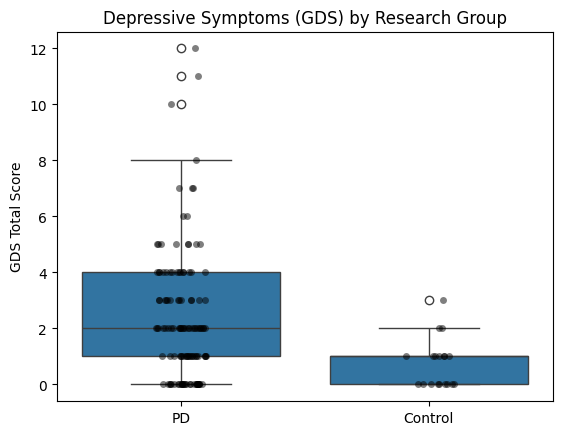

In [ ]:
sns.boxplot(
    data=df_rl,
    x="Research Group",
    y="GDSCALE Total Score"
)
sns.stripplot(
    data=df_rl,
    x="Research Group",
    y="GDSCALE Total Score",
    color="black",
    alpha=0.5
)

plt.title("Depressive Symptoms (GDS) by Research Group")
plt.ylabel("GDS Total Score")
plt.xlabel("")

plt.show()



In [ ]:
from scipy.stats import mannwhitneyu

pd_scores = df_rl.loc[df_rl["Research Group"]=="PD", "GDSCALE Total Score"].dropna()
ctrl_scores = df_rl.loc[df_rl["Research Group"]=="Control", "GDSCALE Total Score"].dropna()

u, p = mannwhitneyu(pd_scores, ctrl_scores, alternative="two-sided")
u, p # PD participants exhibited significantly higher depressive symptom severity than controls


(np.float64(1730.0), np.float64(0.001097877551414528))

In [ ]:
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    return (np.sum(x[:,None] > y) - np.sum(x[:,None] < y)) / (nx*ny)

delta = cliffs_delta(pd_scores.values, ctrl_scores.values)
delta # There is about a 46% higher probability that a randomly selected PD participant has a higher GDS score than a randomly selected control participant.

np.float64(0.4568421052631579)

## Confounder Screening

Potential confounding variables including age, weight, and sex were tested between
Parkinson’s disease and control groups.

Non-parametric tests were used due to sample size imbalance and non-normal distributions.
Age and sex were retained as covariates in subsequent neuroimaging analyses following
standard neuroimaging practice.



In [ ]:
u, p = mannwhitneyu(
    df_rl.loc[df_rl["Research Group"]=="PD", "Age"].dropna(),
    df_rl.loc[df_rl["Research Group"]=="Control", "Age"].dropna()
)
u, p #No statistically significant age difference between PD and Control

(np.float64(1321.0), np.float64(0.432375798443276))

In [ ]:
u, p = mannwhitneyu(
    df_rl.loc[df_rl["Research Group"]=="PD", "Weight"].dropna(),
    df_rl.loc[df_rl["Research Group"]=="Control", "Weight"].dropna()
)
u, p # No significant weight difference between PD and Control

(np.float64(1311.5), np.float64(0.4659247466295229))

In [ ]:
from scipy.stats import fisher_exact

sex_table = pd.crosstab(
    df_rl["Sex"],
    df_rl["Research Group"]
)

fisher_exact(sex_table.values) # Sex distribution does not differ significantly between groups


SignificanceResult(statistic=np.float64(1.7297297297297298), pvalue=np.float64(0.2950469285915405))